In [1]:
#Define problem paramters

# inital wealth
W = 1.0

#Relative risk aversion
gamma = 2.0

# risk premium (expected excess return)
mu = 0.04

#volatility of risk returnd
epsilon = 0.2

#risk-free gross reutn
rf = 1.0



$$


In [2]:
import numpy as np
#compute expected gross risky return E[R]
ER = 0.5 * (1+mu+epsilon) +0.5*(1+mu-epsilon)

# Alternative way to compute E[R] using vectors
probs = np.array((0.5, 0.5))

returns =0.1 + mu + np.array((epsilon, -epsilon))

ER = np.sum(probs*returns)
ER = np.dot(probs, returns)
ER = probs @ returns

risk_premium = ER-rf
# Need: volatility of risky returns
# sigma = sqrt(var(R))
# var(R) = E[R^2] -(E[R])^2
ER2 = 0.5*(1+mu+epsilon)**2 +-0.5 * (1+mu-epsilon)**2
ER2 = probs @ returns**2
varR = ER2 -ER**2
stdR = np.sqrt(varR)

# Sharpe ration
sharpe = risk_premium / stdR
 
print(f'expected gross risky return: {ER:.5f}')
print(f'risk premium:{risk_premium:.5f}')
print(f'variance of risky return: {varR:.5f}')
print(f'std. dev of risky return:{stdR:.5f} ')
print(f'sharpe ratio: {sharpe: .5f}')

expected gross risky return: 0.14000
risk premium:-0.86000
variance of risky return: 0.04000
std. dev of risky return:0.20000 
sharpe ratio: -4.30000


Part 2

In [4]:
import numpy as np

def util(W, gamma):
    '''
    Evaluate utility of consuming W at the end of the perion
    '''
    if gamma ==1:
        #general CRRA case
        u  = np.log(W)
    else: 
        u = W**(1-gamma)/(1-gamma)
    return u

In [9]:
def expected_util(alpha, W, mu, epsilon, gamma):
    '''
    Evalaute expected utility of a given risky share alpha
    '''

    # Gross risk-free return
    Rf = 1
    # 1. compute end-of-period wealth for given alpha for each realization of the risky return

    # Compute end-of-period wealth when returs are high

    R_hi = (1+mu+epsilon)
    W_hi = R_hi * alpha * W +Rf * (1-alpha) *W
    R_lo = (1+mu-epsilon)
    W_lo = R_lo * alpha *W + Rf*(1 - alpha)*W
    # 2. use util( from above to evalaute utility in both return realizations
    # compute utiloty when the return realization is high
    u_hi = util(W_hi, gamma = gamma)
    u_lo = util(W_lo, gamma)
    # 3. compute expected utility as wheithed sum of these.
    EU = 0.5*u_hi+ 0.5 *u_lo

    return EU

In [10]:
expected_util(0.5, W, mu, epsilon, gamma)

-0.9899068322981366

In [11]:
N = 1001
alpha_grid = np.linspace(0.0,1.0,N)

In [12]:
utilities = []
for alpha in alpha_grid:
    u = expected_util(alpha, W, mu, epsilon, gamma)
    utilities.append(u)

In [13]:
utilities = expected_util(alpha_grid, W, mu, epsilon, gamma)

Text(0, 0.5, 'Expected utilities')

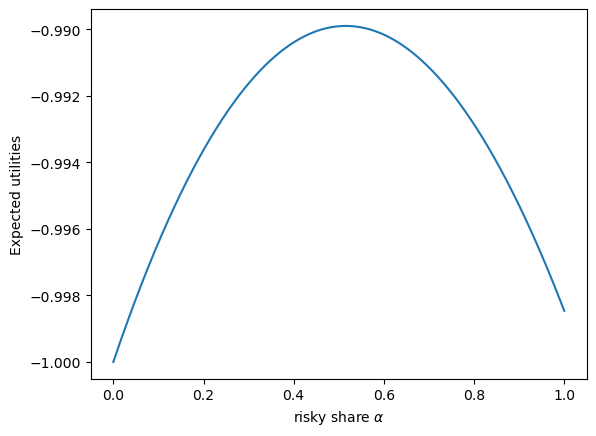

In [14]:
import matplotlib.pyplot as plt

plt.plot(alpha_grid, utilities)
plt.xlabel(r'risky share $\alpha$')
plt.ylabel(r'Expected utilities')

## find optimal risky share

In [15]:
# Find index where EU is maximized
imax = np.argmax(utilities)

# recover optimal riksy share using index of max
alpha_max = alpha_grid[imax]
# Recover maximized EU
EU_max = utilities[imax]

print(f'EU is maximized at alpha = {alpha_max:.5f} with EU = {EU_max:.5f}')

EU is maximized at alpha = 0.51600 with EU = -0.98990


In [16]:
import matplotlib.pyplot as plt


def create_plot(xvalues, yvalues):
    plt.plot(alpha_grid, utilities)
    plt.xlabel(r'risky share $\alpha$')
    plt.ylabel(r'Expected utilities')

## part 5

comaparative statistics woth respect to initial wealth

In [17]:
wealth_grid = np.linspace(1,10,100)
alpha_opt = []

for w in wealth_grid:
    EU = expected_util(alpha_grid, w, mu, epsilon, gamma)
    imax = np.argmax(EU)
    alpha_opt.append(alpha_grid[imax])


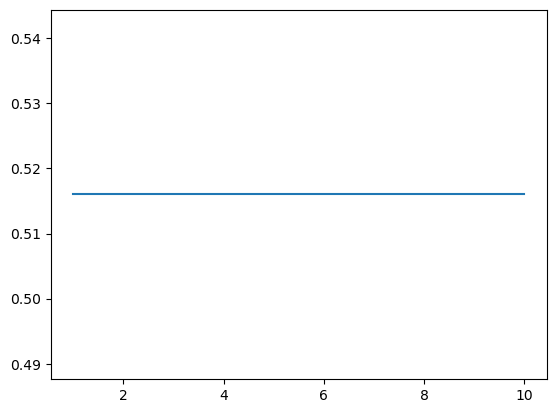

In [18]:
plt.plot(wealth_grid, alpha_opt)